In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Before we start
What does %pylab do exactly?

It:
* Imports numpy and rename it np
* Imports all modules in matplotlib.pylab, which is the Matlab-like plotting interface in matplotlib
* Imports matplotlib.pyplot and rename it plt

among other things.

Read more [here](http://stackoverflow.com/questions/20961287/what-is-pylab)

# Plotting with Matplotlib

In [2]:
x = np.random.randn(1000)

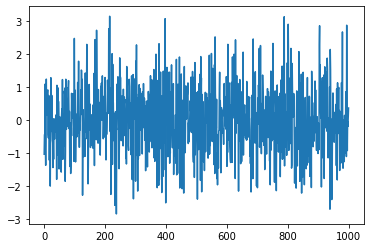

In [3]:
plot(x)

## This line chart doesn't look good; how do we remove the lines?

In [4]:
plot?

Signature: plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, col

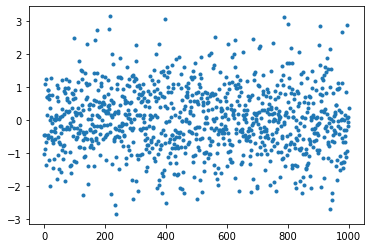

In [5]:
plot(x, '.')

# Histogram

In [9]:
hist?

(array([ 2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  2.,  3.,  2.,
         6.,  1.,  3.,  6.,  9.,  6.,  4., 14.,  8.,  9.,  9., 17., 14.,
         8., 13., 22., 17., 15., 24., 25., 19., 17., 26., 35., 33., 27.,
        16., 20., 28., 25., 35., 24., 25., 19., 31., 23., 29., 24., 24.,
        17., 27., 23., 16., 24., 16., 15., 17., 14., 13.,  9., 12.,  9.,
        11.,  4.,  7.,  8.,  3.,  6.,  5.,  2.,  4.,  1.,  1.,  1.,  3.,
         2.,  2.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.95787003, -2.88770712, -2.81754421, -2.7473813 , -2.67721839,
        -2.60705548, -2.53689257, -2.46672966, -2.39656675, -2.32640384,
        -2.25624093, -2.18607802, -2.11591511, -2.0457522 , -1.97558929,
        -1.90542638, -1.83526347, -1.76510056, -1.69493766, -1.62477475,
        -1.55461184, -1.48444893, -1.41428602, -1.34412311, -1.2739602 ,
        -1.20379729, -1.13363438, -1.06347147, -0.99330856, -0.923145

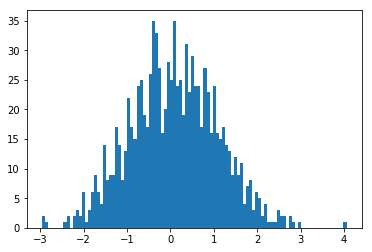

In [10]:
hist(x, bins=100)

# Customizing plots

In [11]:
x = np.arange(-10, 10, 0.01)
y = np.sin(x)

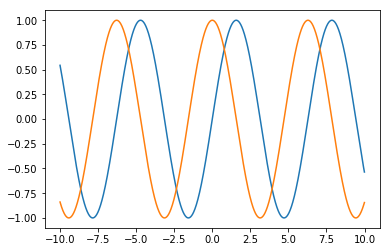

In [12]:
plot(x, y)
plot(x, np.cos(x))

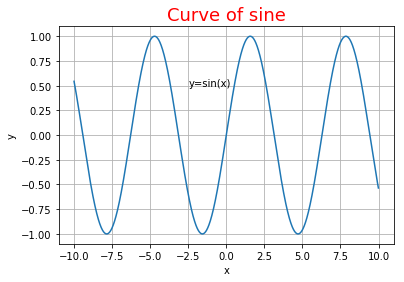

In [13]:
# name the x axis
plt.xlabel('x')
# name the y axis
plt.ylabel('y')
# give a title to the plot
plt.title('Curve of sine', fontsize=18, color='red')
# put some text in the graph
plt.text(-2.5, 0.5, 'y=sin(x)')
# enable grid
plt.grid(True)
plot(x, y)

### small quiz
* plot tan(x) and cot(x) side by side
* tan(x) to be red
* cot(x) to be yellow
* some text y=tan(x), y=cot(x) somewhere in the plot


hint: 

* there is no np.cot(), but cot = 1/tan
* either tan(x) or cot(x) will be too close to infinity if x is too close to n \* pi / 2; remove all x[i] where abs(x[i] - n * pi / 2) < some threshold, say 0.1

In [14]:
# make sure x stays away from 0, n * pi / 2
# define a new x where abs(x[i] - n * pi / 2) > 0.1 for n -> -4 to 4

x_new = []
for xi in x:
    safe = True
    for n in range(-8, 9):
        if abs(xi - n * np.pi / 2) < 0.1:
            safe = False
            break
    if safe:
        x_new.append(xi)

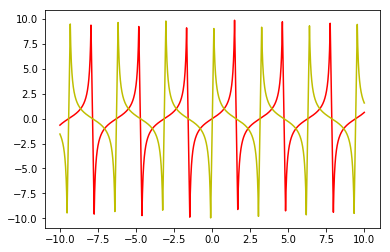

In [15]:
y2 = np.tan(x_new)
y3 = 1 / y2
plot(x_new, y2, 'r')
plot(x_new, y3, 'y')

# Plotting multiple plots together

In [16]:
plt.subplot?

In [17]:
np.

SyntaxError: invalid syntax (<ipython-input-17-df0eca0bfa5c>, line 1)

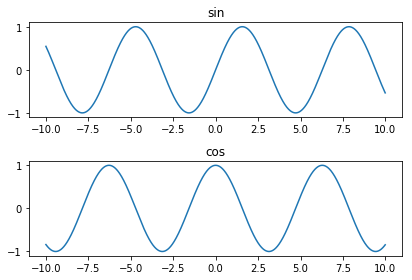

In [18]:
plt.subplot(211)
plt.title('sin')
plot(x, y)

y2 = np.cos(x)
plt.subplot(212)
plt.title('cos')
plt.tight_layout()
plot(x,y2)

### Quiz

# Other plots
## [Scatter plot](https://en.wikipedia.org/wiki/Scatter_plot)

In [19]:
x = np.random.rand(10)
y = x ** 2

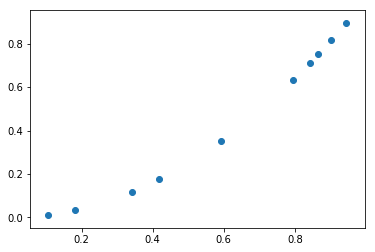

In [20]:
scatter(x, y)

## Pie chart

In [36]:
pie?

([<matplotlib.patches.Wedge at 0x10cdd2590>,
 [Text(0.646564,0.889919,'IT'),
  Text(-1.1,-1.02989e-07,'Marketing'),
  Text(1.28737e-07,-1.1,'HR'),
  Text(0.889919,-0.646564,'Management')])

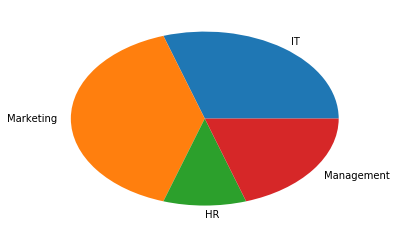

In [21]:
x = [30, 40, 10, 20]
labels = ['IT', 'Marketing', 'HR', 'Management']
pie(x, labels=labels)

## Bar chart

For example, the numbers of players of different heights in a basketball team

In [48]:
bar?

<BarContainer object of 6 artists>

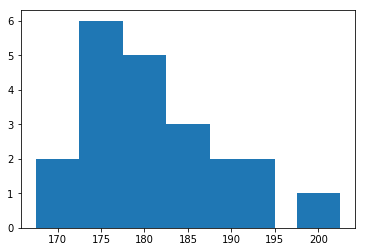

In [22]:
left = (170, 175, 180, 185, 190, 200)
height = (2, 6, 5, 3, 2, 1)
width = (5, 5, 5, 5, 10, 5)
bar(left, height, width=width)

# Use basemap to produce map plots

In [24]:
with open('twitter.txt') as f:
    lines = f.readlines()

In [25]:
lines[1].split('\t')

['USER_79321756',
 '2010-03-03T04:55:32',
 '\xc3\x9cT: 47.528139,-122.197916',
 '47.528139',
 '-122.197916',
 '@USER_77a4822d @USER_2ff4faca okay:) lol. Saying ok to both of yall about to different things!:*\n']

In [26]:
lats = [float(i.split('\t')[3]) for i in lines]
lons = [float(i.split('\t')[4]) for i in lines]

In [27]:
print lats[1], lons[1]

47.528139 -122.197916


In [28]:
# figure size configuration
rcParams['figure.figsize'] = 20, 20

'conda install basemap'

/Users/alston/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/alston/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


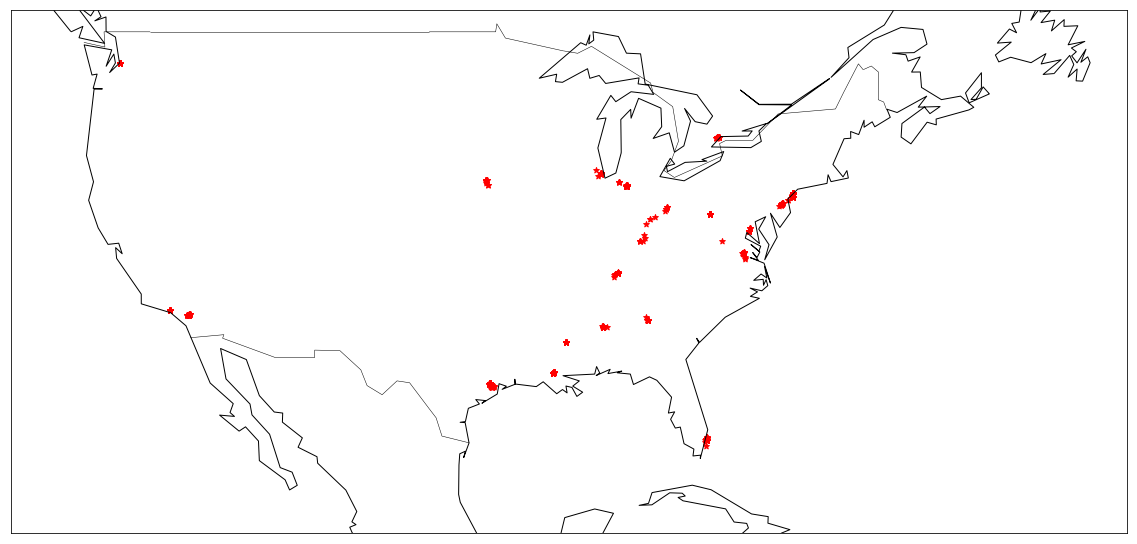

In [30]:
from mpl_toolkits.basemap import Basemap

m = Basemap(llcrnrlon=-130.,llcrnrlat=20.,urcrnrlon=-50.,urcrnrlat=50.,\
            projection='merc')
m.drawcoastlines()
m.drawcountries()
x, y = m(lons[:1000],lats[:1000])
m.scatter(x,y,marker='*',color='r')
#plt.show()

In [ ]:
m.scatter?

## See more basemap examples [here](http://matplotlib.org/basemap/users/examples.html)

# Plotting from Pandas dataframes

In [31]:
df = pd.DataFrame(np.random.rand(10, 4), columns=list('ABCD'))
df

A         B         C         D
0  0.721747  0.950265  0.611558  0.510608
1  0.039885  0.014439  0.568843  0.153342
2  0.709826  0.931495  0.043652  0.171146
3  0.026949  0.296770  0.522219  0.563488
4  0.366342  0.317339  0.198018  0.435397
5  0.969149  0.543313  0.195393  0.864977
6  0.811761  0.356153  0.026509  0.378158
7  0.843792  0.516852  0.611607  0.727021
8  0.264471  0.060636  0.012374  0.086647
9  0.954673  0.057566  0.312894  0.037120

In [ ]:
df.cumsum?

In [32]:
dfc = df.cumsum()
dfc

A         B         C         D
0  0.721747  0.950265  0.611558  0.510608
1  0.761632  0.964703  1.180401  0.663950
2  1.471458  1.896198  1.224053  0.835096
3  1.498407  2.192968  1.746272  1.398584
4  1.864748  2.510307  1.944290  1.833982
5  2.833897  3.053620  2.139682  2.698958
6  3.645658  3.409774  2.166191  3.077117
7  4.489451  3.926626  2.777798  3.804138
8  4.753921  3.987261  2.790172  3.890785
9  5.708594  4.044827  3.103066  3.927905

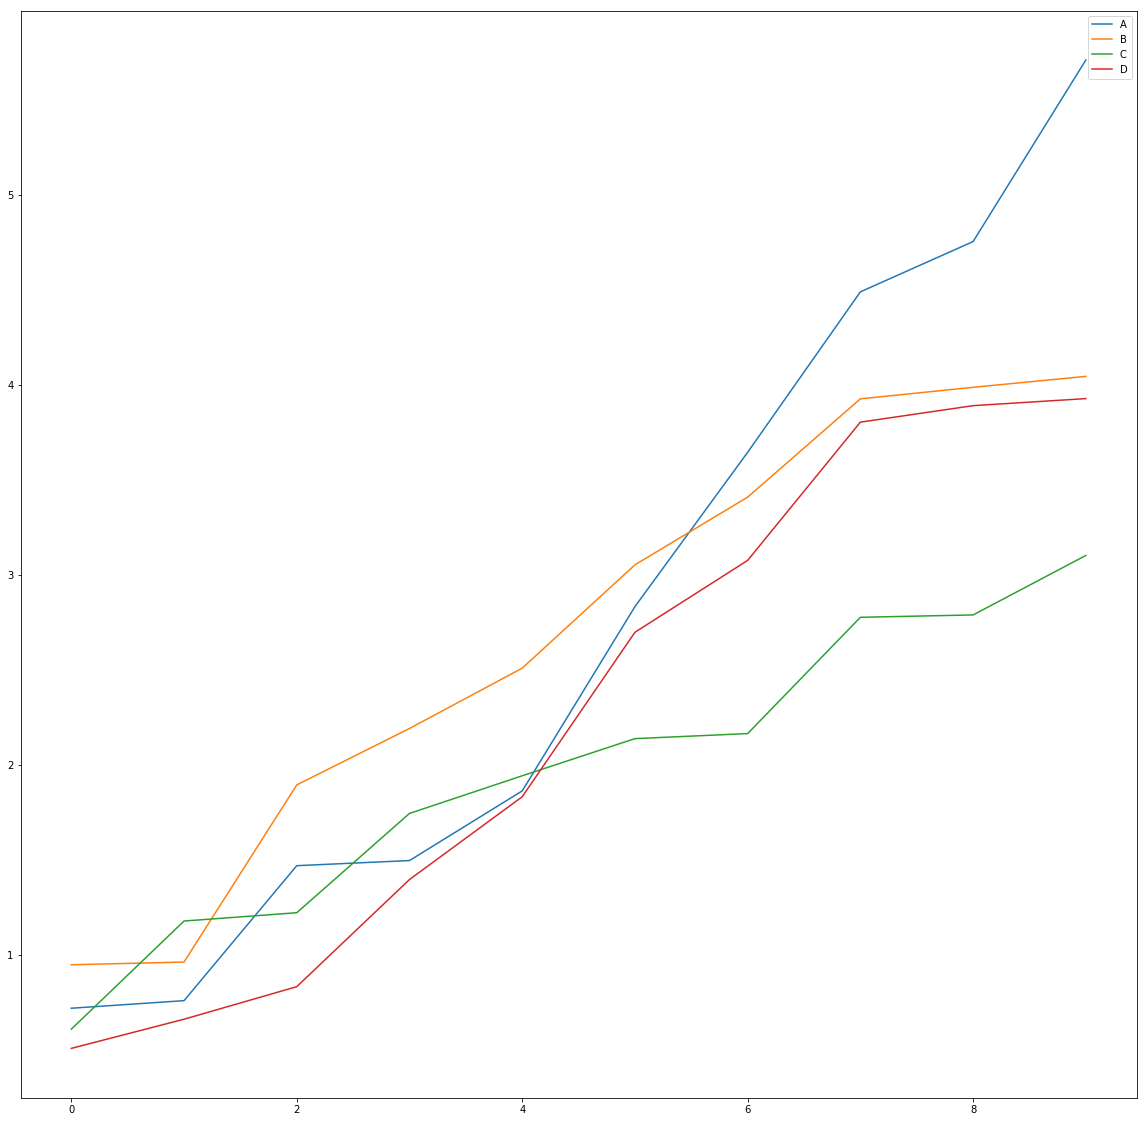

In [33]:
dfc.plot()

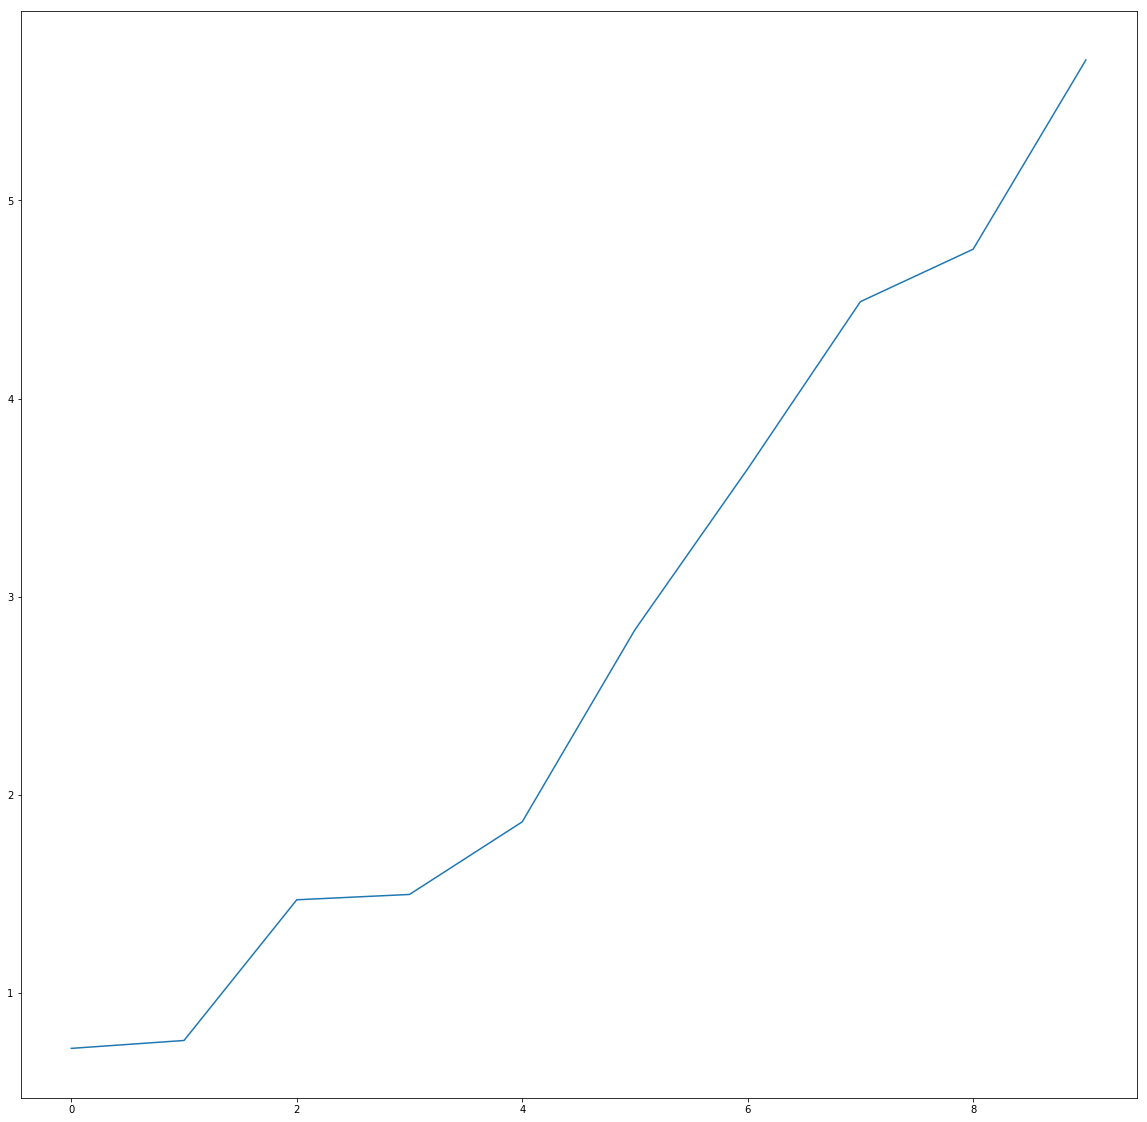

In [34]:
# plot a specific column
dfc['A'].plot()

# Other types of plots

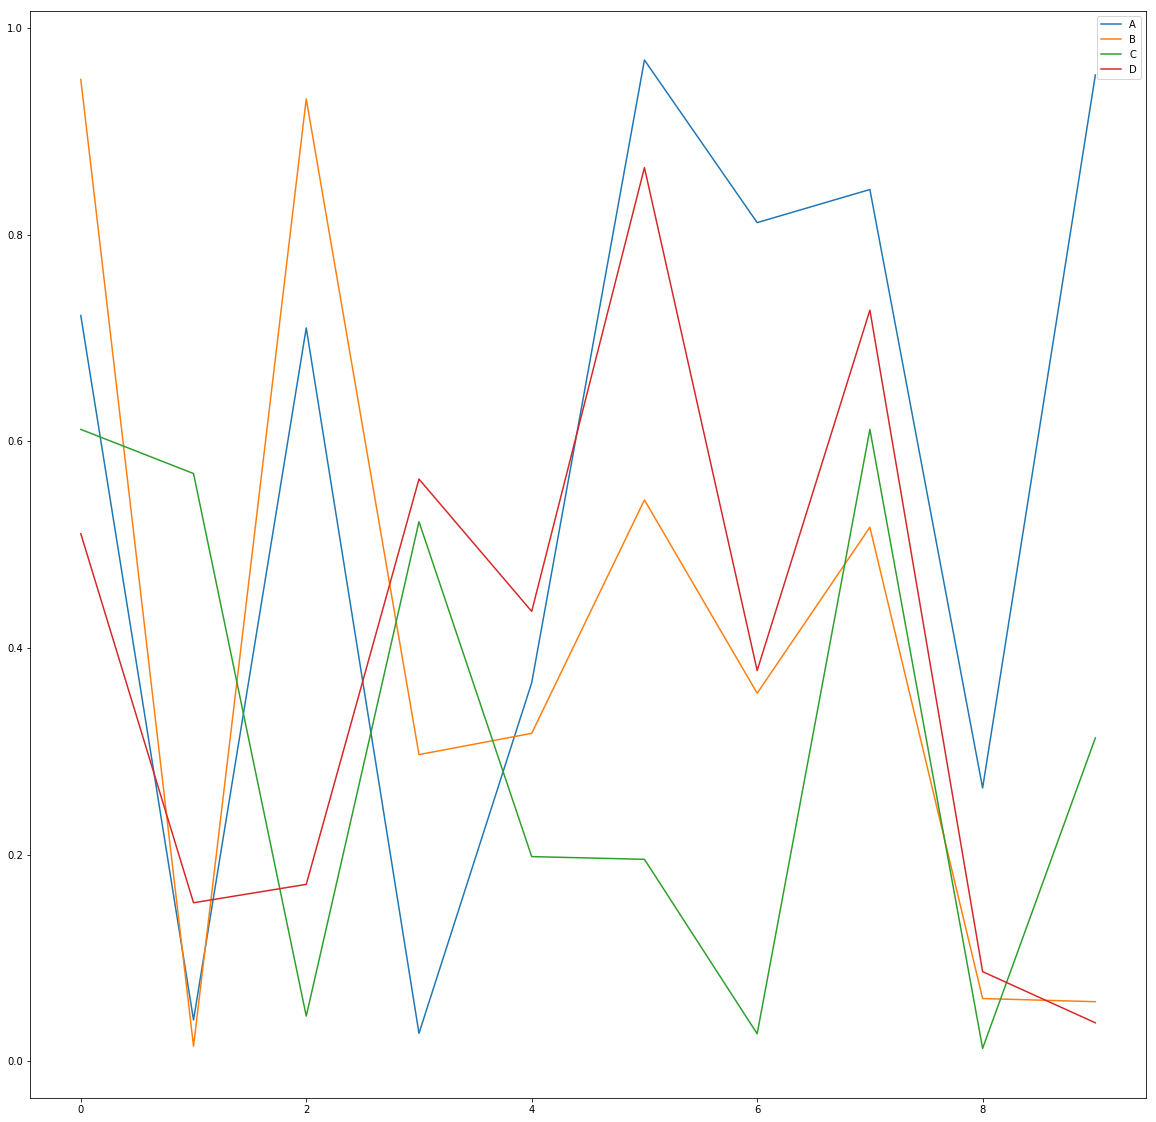

In [35]:
df.plot()

In [36]:
[i for i in dir(df.plot) if '_' not in i]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

# Some examples

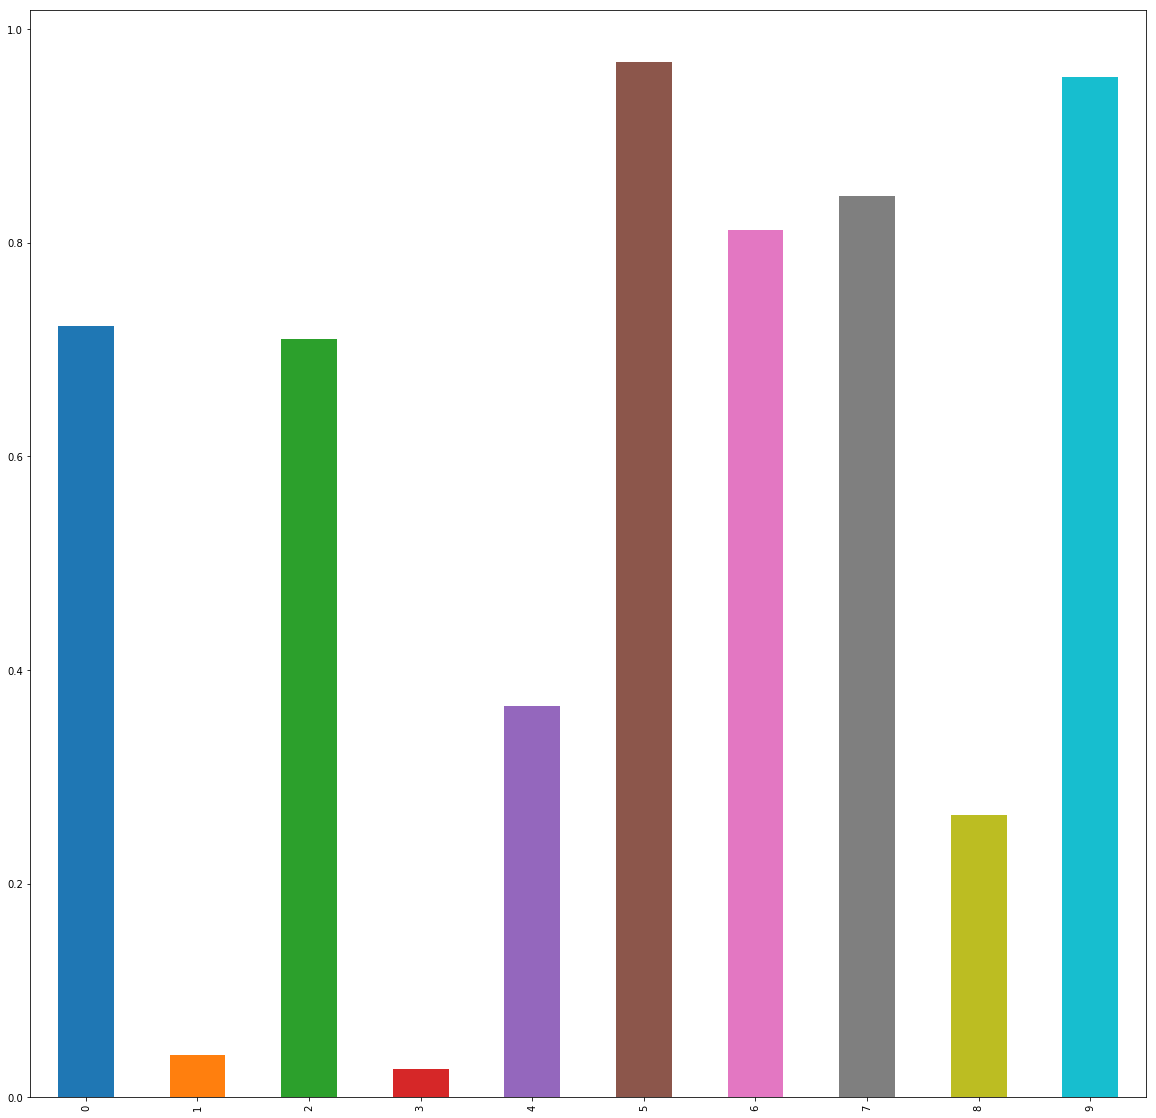

In [37]:
df['A'].plot.bar()

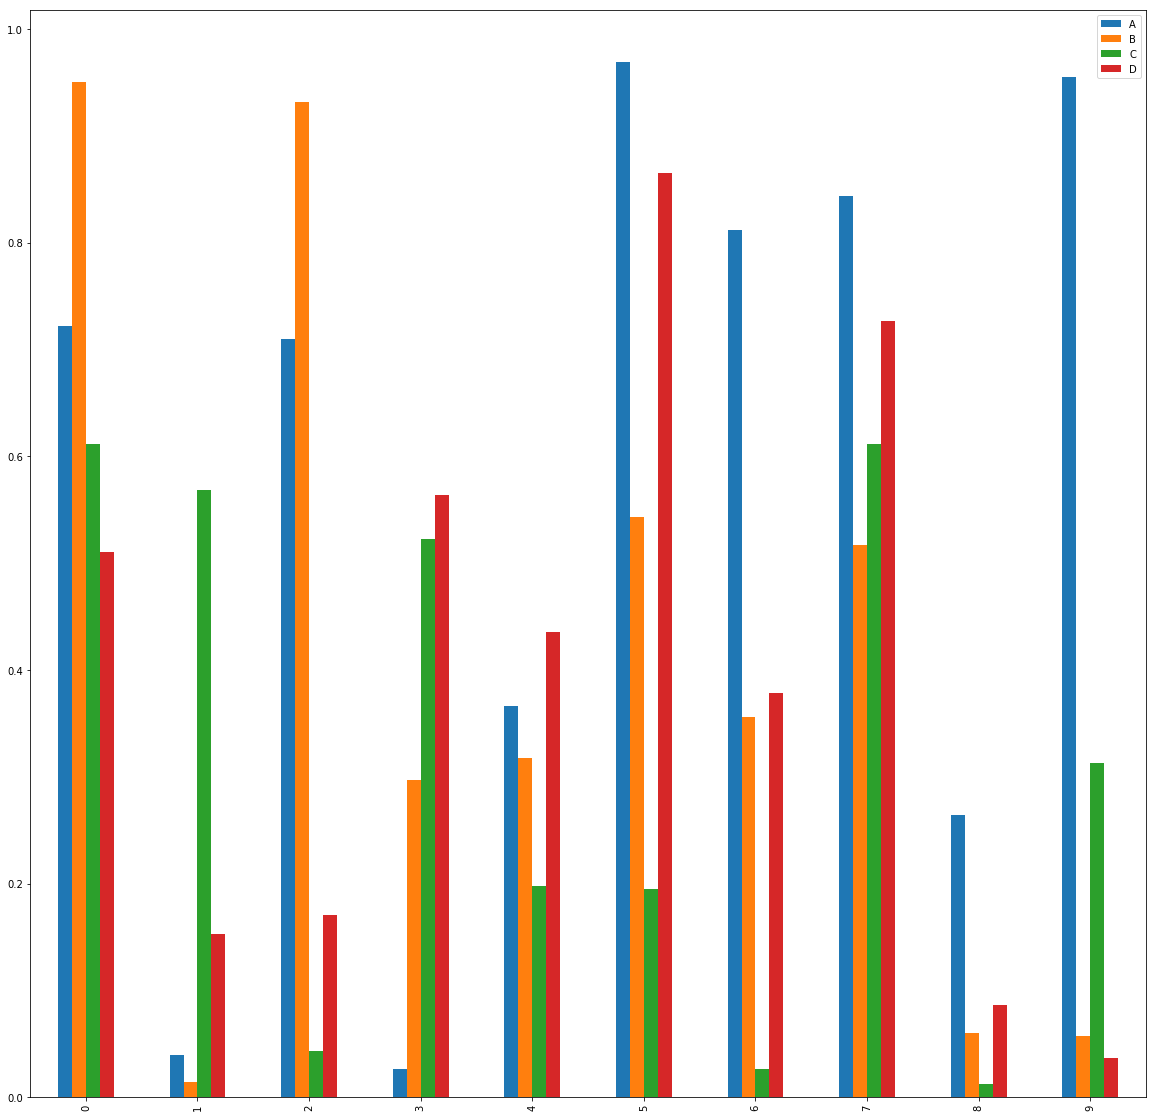

In [38]:
df.plot.bar()

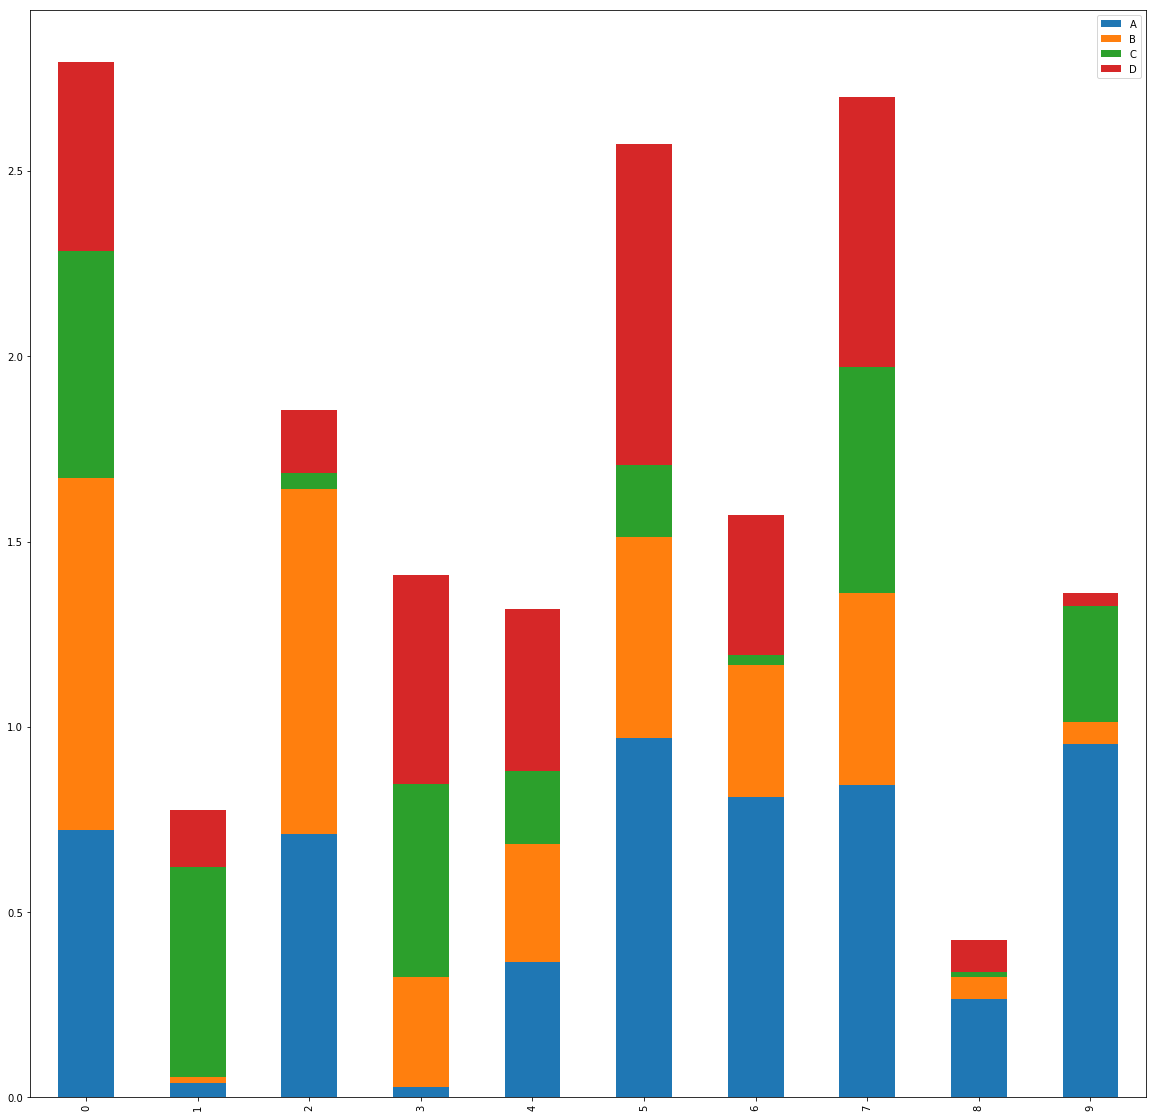

In [39]:
df.plot.bar(stacked=True)

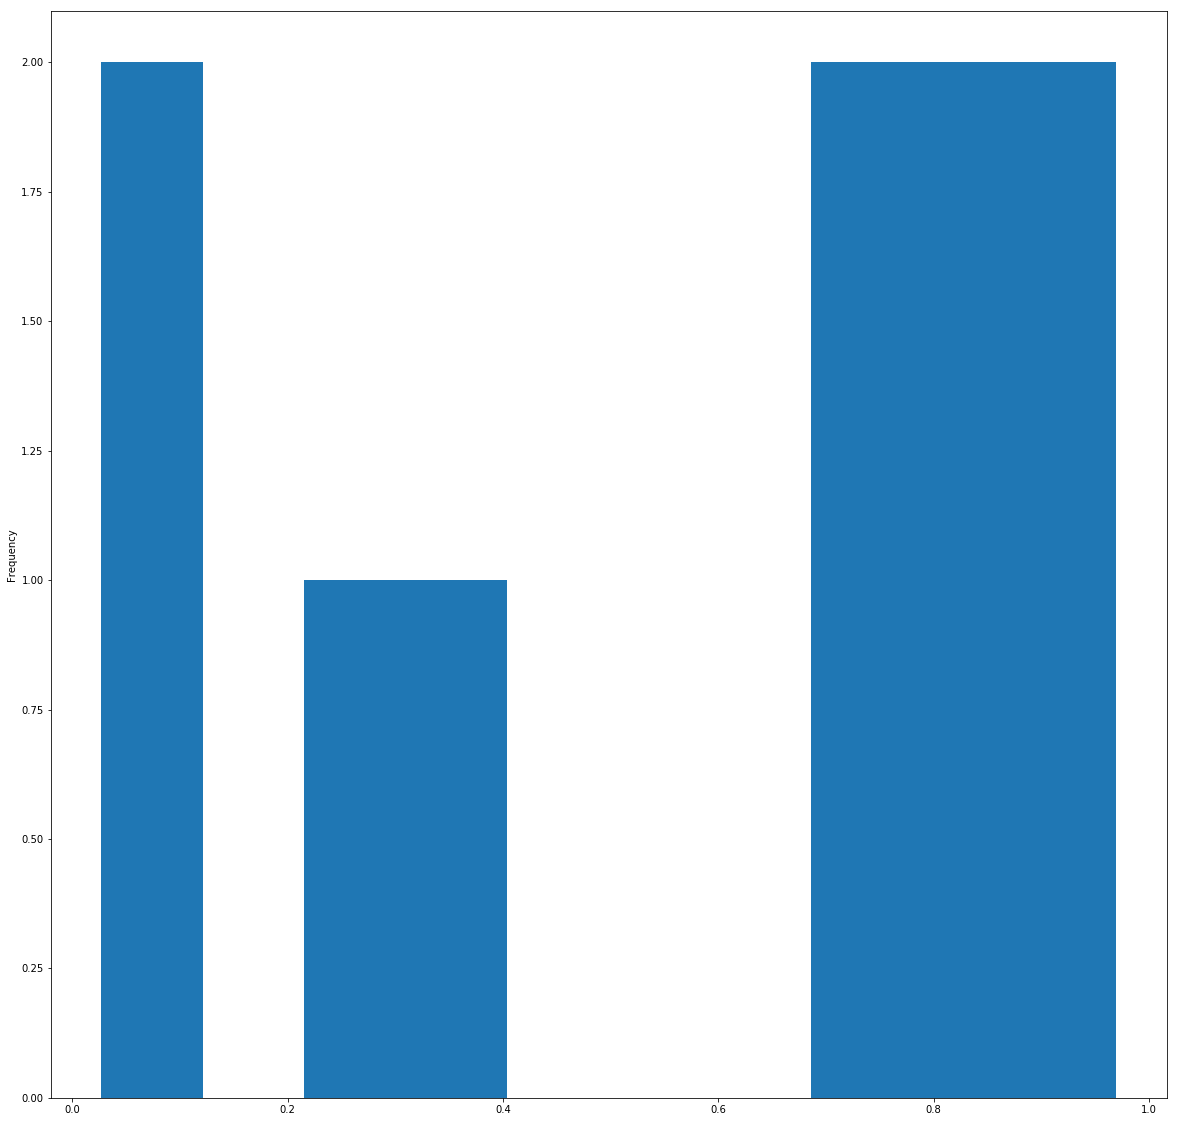

In [40]:
df['A'].plot.hist()

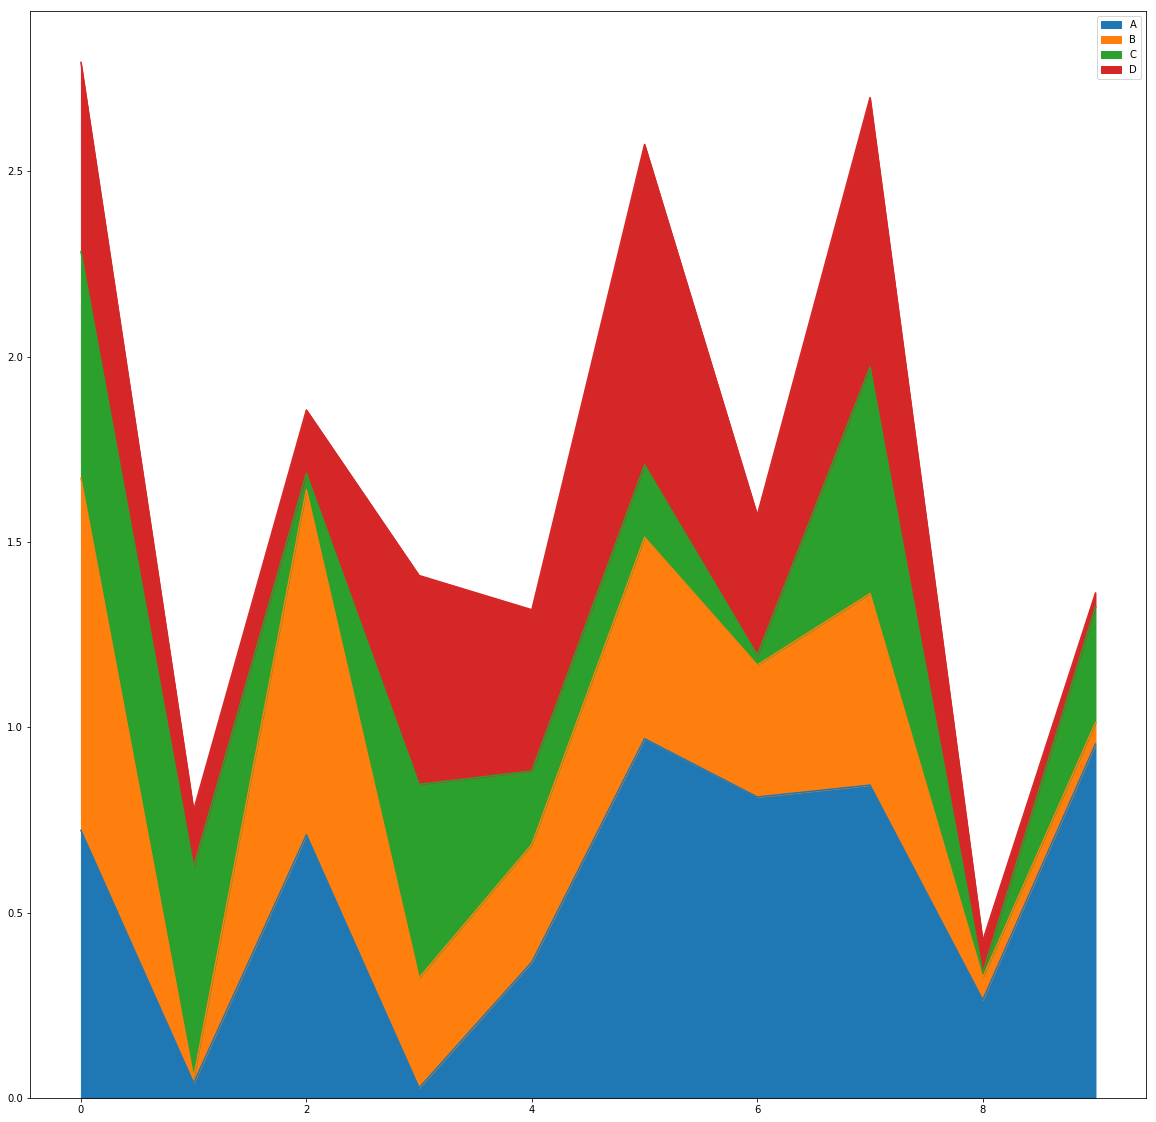

In [41]:
df.plot.area()

Read more [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html)